# Assignment 1 - Practical Data Science

Theofanis Nitsos | p3352325


# Exploring AirBnB in Athens

We visit http://insideairbnb.com/get-the-data.html and we download all relevant datasets for Athens, Attica, Greece from 21 September 2023. 
First we will familiarise with the datasets to understand what variables they contain, if there is an overlap and what are the differences. The datasets have to be saved in the same folder as the notebook.

The csv files are stored in a dataset using the pandas library, while the csv.gz files need a bit more processing. 

The data dictionary provided from the relevant site is very helpful to determine which dataset to use.

In the first place we will deal with the listings.csv.gz and the listings.csv to figure out their differences.

In [1]:
import gzip
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import matplotlib.dates as mdates
import datetime

In [2]:
# Extract the listings.csv.gz data
listings_input = 'listings.csv.gz'
listings_output = 'listings_gz.csv'

with gzip.open(listings_input, 'rt', encoding = 'utf-8') as gzipped_file:
    with open(listings_output, 'w', newline='',encoding = 'utf-8') as output:
        for line in gzipped_file:
            output.write(line)

            
listings_df = pd.read_csv('listings_gz.csv')

listings_sum_df = pd.read_csv('listings.csv')

In [3]:
# printing the first rows of the dataset
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20230921043851,2023-09-21,city scrape,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,...,4.88,4.60,4.74,00000957568,t,7,7,0,0,0.28
1,10990,https://www.airbnb.com/rooms/10990,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,...,4.89,4.78,4.75,00001070920,t,7,7,0,0,0.49
2,10993,https://www.airbnb.com/rooms/10993,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,...,4.98,4.82,4.79,00000957080,t,7,7,0,0,0.69
3,10995,https://www.airbnb.com/rooms/10995,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,"AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,...,4.90,4.82,4.79,00000957422,t,7,7,0,0,0.19
4,724485,https://www.airbnb.com/rooms/724485,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,"Value for money in an central but not ""tourist...",Opposite the building is one of Athens main pa...,https://a0.muscache.com/pictures/miso/Hosting-...,3745284,...,4.98,4.66,4.88,00000564690,t,2,2,0,0,3.87


In [4]:
# printing the first rows of the dataset
listings_sum_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,85,1,92,2023-07-07,0.69,7,52,5,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,60,1,30,2023-06-02,0.19,7,73,1,00000957422
4,27262,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,85,1,21,2023-06-02,0.16,7,90,2,00000957579


## Comparing listings.csv and listings.gz.csv
Both datasets have the same number of rows and judging from the above results besides listing.csv having less columns and in some cases edited information (for example it is sorted), which is clearly described in the online data dictionary it seems safe to use both datasets without loosing information.

# Neighbourhood Listings in Descending Order
The neighbourhood information is stored in multiple columns but it is different in each column. We will closely examine each column by printing it out and using the .unique()
- neighbourhood_overview: Host description of the neighbourhood. It is not convenient for us as each host describes his neighbourhood in a non-standard way
- host_neighbourhood: since this is text scrapped from the website there seem to be mistakes and text that does not make sense (e.g. 'Friedrichshain', 'Coração de Jesus')
- neighbourhood is also not good to use as some times the entry is with latin alphabet sometimes in greek and the entries are not standardised and cleansed
- neighbourhood_cleansed: seems to be the text to use as it is cleansed and standardised. It is worth noting that the column neighbourhood in the listings summary dataset provides the exact same information.
- neighbourhood_group_cleansed: appears to be filled with NaN values 

In [5]:
# the code below was used to screen the most suitable neighbourhood column but it is not important for the excercise itself
listings_df['neighborhood_overview']
listings_df['host_neighbourhood'].unique()
listings_df['neighbourhood'].unique()
listings_df['neighbourhood_cleansed'].unique()
listings_df.dropna(subset=(['neighbourhood_group_cleansed']))

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [6]:
# Group the listings by neighborhood and count the number of listings in each neighborhood
neighborhood_counts = listings_sum_df['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'Number of Listings']

# Sort the neighborhoods by popularity (in decreasing order)
sorted_neighborhoods = neighborhood_counts.sort_values(by='Number of Listings', ascending=False)

# Display the sorted DataFrame
sorted_neighborhoods

,neighbourhood,Number of Listings
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
2,ΝΕΟΣ ΚΟΣΜΟΣ,980
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
5,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
6,ΠΑΓΚΡΑΤΙ,511
7,ΑΜΠΕΛΟΚΗΠΟΙ,452
8,ΚΟΛΩΝΑΚΙ,425
9,ΑΚΡΟΠΟΛΗ,386


In [7]:
# sanity check to ensure all listings in the dataframe are present
sorted_neighborhoods["Number of Listings"].sum() 

12955

# Neighbourhood Listings - Results

The most central parts in Athens appear to have the most airbnb properties which makes sense since tourists visiting Athens would like to visit main points of interest that are located in the center of the city and minimise commuting.

# Neighbourhood Prices in Descending Order

In order to create a table with the prices per neighbourhood we will use again the listings summary dataset. Based on the neighbourhood column we will group the data and using the daily price we will calculate the mean, median and standard deviation of the price of properties in the same neighbourhood. 

It is worth mentioning that the price column in the listings summary dataset is more convenient as the prices are numeric and do not include the dollar or other signs. Thus they are easier to process. 

According to the data dictionary the prices are in local currency thus EUR and the dollars are neglected.

In [8]:
# Create a pivot table to display mean, median, standard deviation of prices per neighborhood
neigh_prices = pd.pivot_table(listings_sum_df, index='neighbourhood', values='price', aggfunc=['mean', 'median','std','count'])
neigh_prices.columns = ['Mean Price', 'Median Price', 'Standard Deviation','Listings count']

#sort the pivot table according to the median price
sorted_neigh_prices = neigh_prices.sort_values(by='Median Price', ascending = False)

# Print the sorted table
sorted_neigh_prices

,Mean Price,Median Price,Standard Deviation,Listings count
neighbourhood,,,,
ΡΗΓΙΛΛΗΣ,367.800000,120.0,578.622675,5
ΖΑΠΠΕΙΟ,224.068323,114.0,641.163173,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,140.650662,104.0,229.183015,2416
ΑΚΡΟΠΟΛΗ,195.344560,100.0,703.321565,386
ΚΟΛΩΝΑΚΙ,128.595294,100.0,104.431349,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,120.284314,90.5,104.613533,1122
ΘΗΣΕΙΟ,126.492228,90.0,124.176775,386
ΚΕΡΑΜΕΙΚΟΣ,123.883382,89.0,136.367487,343
ΛΥΚΑΒΗΤΤΟΣ,104.561728,75.0,87.859850,162


In [9]:
# Create a pivot table to display mean, median, standard deviation of prices per neighborhood
neigh_prices = pd.pivot_table(listings_sum_df, index='neighbourhood', values='price', aggfunc=['mean', 'median','std','count','max','min'])
neigh_prices.columns = ['Mean Price', 'Median Price', 'Standard Deviation','Listings count','Maximum price','Minimum price']

#sort the pivot table according to the median price
sorted_neigh_prices = neigh_prices.sort_values(by='Median Price', ascending = False)

# Print the sorted table
sorted_neigh_prices

,Mean Price,Median Price,Standard Deviation,Listings count,Maximum price,Minimum price
neighbourhood,,,,,,
ΡΗΓΙΛΛΗΣ,367.800000,120.0,578.622675,5,1400,71
ΖΑΠΠΕΙΟ,224.068323,114.0,641.163173,161,8000,23
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,140.650662,104.0,229.183015,2416,8000,11
ΑΚΡΟΠΟΛΗ,195.344560,100.0,703.321565,386,8000,14
ΚΟΛΩΝΑΚΙ,128.595294,100.0,104.431349,425,910,18
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,120.284314,90.5,104.613533,1122,1220,18
ΘΗΣΕΙΟ,126.492228,90.0,124.176775,386,1649,22
ΚΕΡΑΜΕΙΚΟΣ,123.883382,89.0,136.367487,343,2000,27
ΛΥΚΑΒΗΤΤΟΣ,104.561728,75.0,87.859850,162,693,28


# Neighbourhood Prices - Results
More expensive neighbourhoods in Athens appear to have higher prices but not necessarily a lot of airbnb listings as some of these areas are reserved usually for businesses etc. Also proximity to Athen's center seems to play a role in prices.

Some neighbourhoods appear to have really high standard deviation, such as Mouseio-exarcheia-neapoli indicating the presence of both very low cost and high cost properties. By adding the min and max arguments we notice properties with extremely high price (~8000) and in particular for the Mouseio-exarcheia-neapoli the max price is 80,275 which does not make sense.

# Availability per Day

To access the availability per day of the listings we will use the calendar dataset which includes for each date the availability of the listings for the next year. 

First of all we will extract the information from the calendar.csv.gz and then dismiss the entries (listings and dates) that are not available. Then we will add up the available listings based on the date and create a plot with the date on the x axis and the number of available listings for this day on the y axis.

In [10]:
# Extract the calendar.csv.gz data
calendar_input = 'calendar.csv.gz'
calendar_output = 'calendar_gz.csv'

with gzip.open(calendar_input, 'rt', encoding = 'utf-8') as gzipped_file:
    with open(calendar_output, 'w', newline='', encoding = 'utf-8') as output:
        for line in gzipped_file:
            output.write(line)

            
calendar_df = pd.read_csv('calendar_gz.csv')

calendar_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180
...,...,...,...,...,...,...,...
4728224,984289252638695828,2024-09-15,t,$18.00,$18.00,1,365
4728225,984289252638695828,2024-09-16,t,$16.00,$16.00,1,365
4728226,984289252638695828,2024-09-17,t,$16.00,$16.00,1,365
4728227,984289252638695828,2024-09-18,t,$16.00,$16.00,1,365


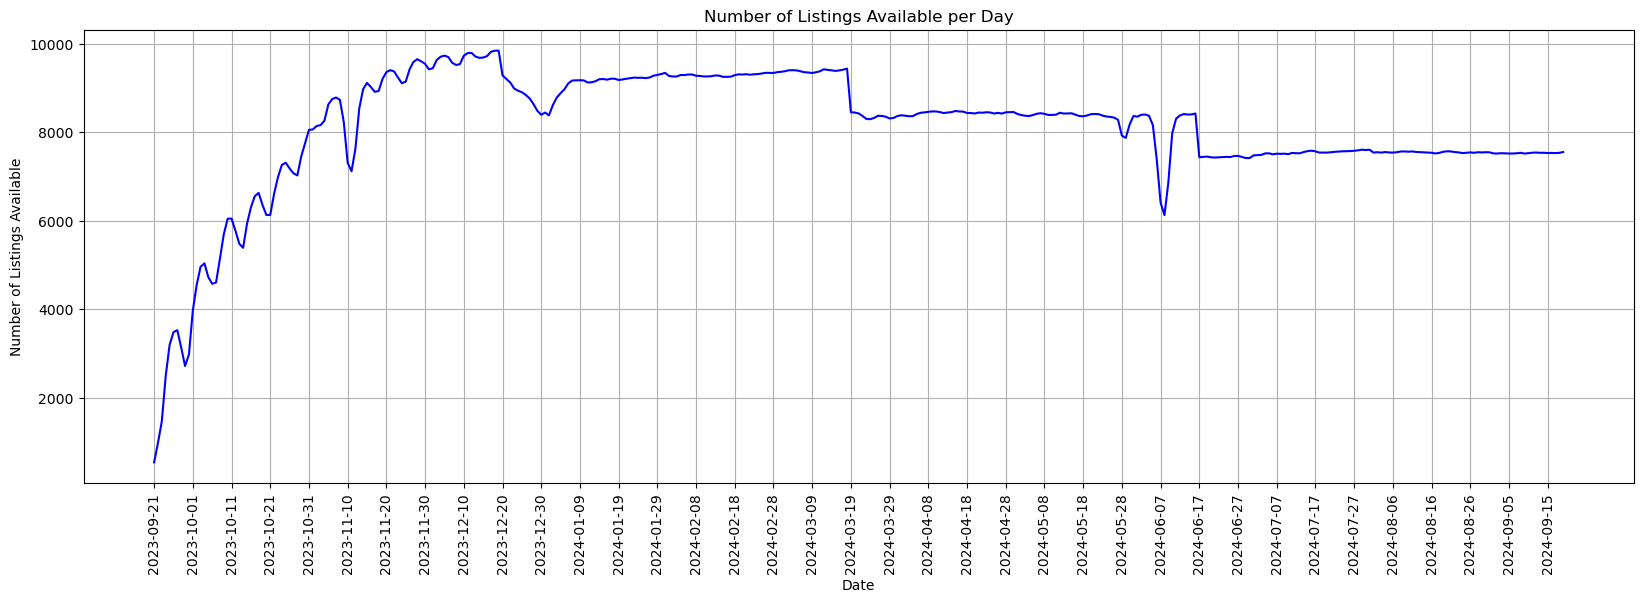

In [11]:
# Availability per Day
# Filter the DataFrame to select only the rows where 'available' is True
#
calendar_df['date']=pd.to_datetime(calendar_df['date'])
#
available_df = calendar_df[calendar_df['available']== 't']

# Group the data by date and count the number of available listings per day
available_count_per_day = available_df.groupby('date')['listing_id'].count()

# Reset the index to have 'date' as a column, not an index
available_count_per_day = available_count_per_day.reset_index()

# Create the plot
plt.figure(dpi=100,figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(available_count_per_day['date'], available_count_per_day['listing_id'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Number of Listings Available')
plt.title('Number of Listings Available per Day')
plt.grid(True)

# Set the x-axis ticks to include every 10th date
n = len(available_count_per_day)
x_ticks = available_count_per_day['date'][::10]
plt.xticks(x_ticks, rotation= 90)

plt.show()

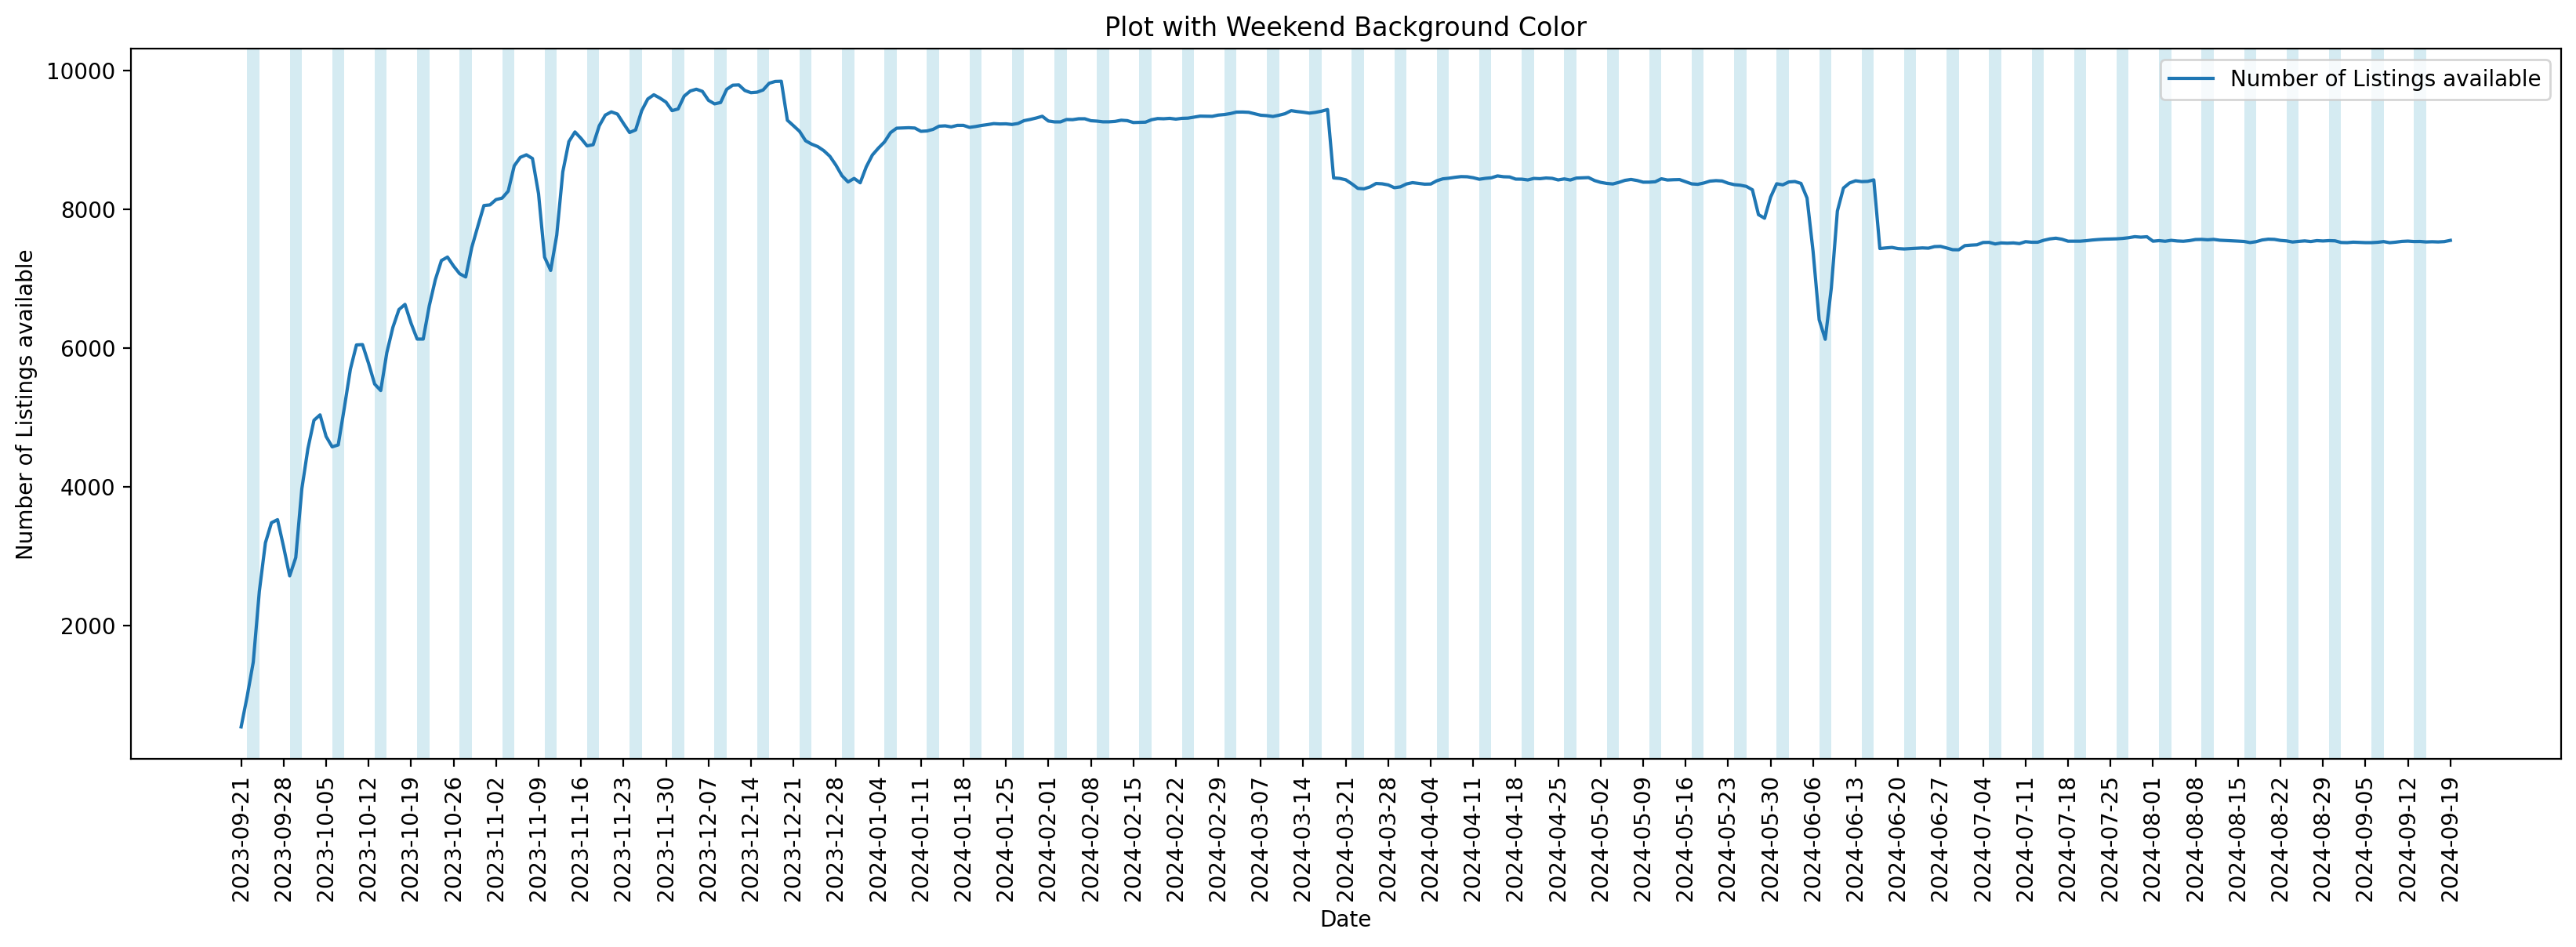

In [12]:
# Determine weekend days
date_range = pd.date_range(start=available_df['date'].min(), end = available_df['date'].max())
weekend_mask = (date_range.weekday >= 5)  # 5 and 6 correspond to Saturday and Sunday

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(20, 6), dpi = 200)

# Plot your data
ax.plot(available_count_per_day['date'], available_count_per_day['listing_id'], label='Number of Listings available')

# Set the background color for weekend days
for i in range(len(weekend_mask)):
    if weekend_mask[i]:
        if i == 0:
            start_date = date_range[0]
        else:
            start_date = date_range[i - 1]

        end_date = date_range[i]

        ax.axvspan(start_date, end_date, facecolor='lightblue', alpha=0.5)

# Customize your plot
ax.set_xlabel('Date')
ax.set_ylabel('Number of Listings available')
ax.set_title('Plot with Weekend Background Color')
ax.legend()
#plt.grid(True)
# Set the x-axis ticks to include every 10th date
n = len(available_count_per_day)
x_ticks = available_count_per_day['date'][::7]
plt.xticks(x_ticks, rotation= 90)

# Show the plot
plt.show()

# Availability per Day - Results

In order to provide a better visual result we rotated the dates on the x axis and indicated the date every 7 days to avoid the clutter. Short term availability is limited which makes sense since people tend to book hotels and travels for the next couple of months. 

The small reductions in availability happening over the first stage of the plot is due to the weekends, since most people plan their holidays to include weekends in order not to waste time off work. This can be seen by the second plot where weekends are coloured.

Around Christmas and holidays there is a decrease in availability as it is common for people to go on vacation. During Q1 availability is pretty high since Athens is not considered a winter-destination. For April and May availability is lower than for Q1 since the weather improves in Athens and then for June, July and August is is even lower despite being almost 1 year ahead compared to the present. 

A further step we took was pointing out the weekends on the plot with a light blue background colour. We can see that usually the local minimum in available listings are close to or in weekends.

**Fun Fact** During the weekend 8-9 June 2024 there is a coldplay concert in OAKA. During these dates the available listings in Athens are significantly lower than for the rest of the summer season. Not sure if this is the reason but could be. 

# Reviews, Occupacy per Listing, Average Income

# Reviews

To create the histogram we first bin the number of reviews from the minimum to the maximum rounding them up to the closest hundrend; that's why we use ceil and not round. 

We use the listings summary dataset where the number_of_reviews variable is stored. We calculate the min and max number of reviews, round the reviews up to the closest hundrend and then bin them. Since we rounded them up each bin step is 100. Then using these data we create the histogram.

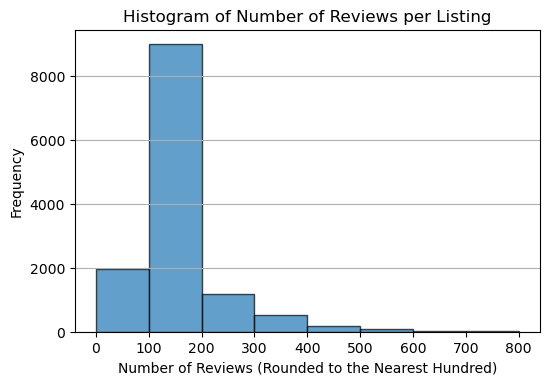

In [13]:
#Reviews, Occupacy per Listing, Average Income

max_reviews = listings_sum_df['number_of_reviews'].max()
min_reviews = listings_sum_df['number_of_reviews'].min()


bin_edges = np.arange(min_reviews, np.ceil(max_reviews / 100) * 100 , 100)

listings_sum_df['rounded_reviews']= np.ceil(listings_sum_df['number_of_reviews']/100)*100

# Create the histogram
plt.figure( dpi=100)
plt.hist(listings_sum_df['rounded_reviews'],bins=bin_edges, edgecolor='black', alpha = 0.7) 

# Add labels and a title to the plot
plt.xlabel('Number of Reviews (Rounded to the Nearest Hundred)')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Reviews per Listing')
plt.grid(axis='y')

# Display the histogram
plt.show()

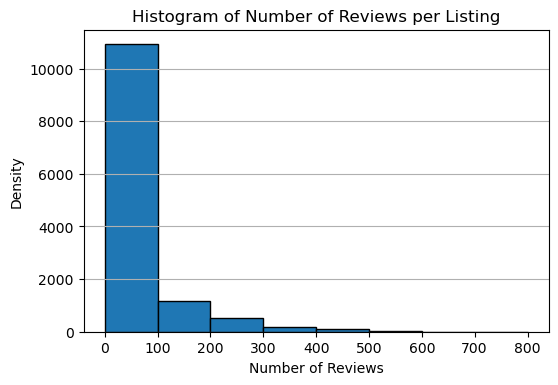

In [14]:
from matplotlib.ticker import PercentFormatter

#Reviews, Occupacy per Listing, Average Income

max_reviews = listings_sum_df['number_of_reviews'].max()
min_reviews = listings_sum_df['number_of_reviews'].min()


bin_edges = np.arange(min_reviews, np.ceil(max_reviews / 100) * 100 , 100)

#listings_sum_df['rounded_reviews']= np.ceil(listings_sum_df['number_of_reviews']/100)*100

# Create the histogram
plt.figure( dpi=100)
plt.hist(listings_sum_df['number_of_reviews'], edgecolor='k',bins=bin_edges) 
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add labels and a title to the plot
plt.xlabel('Number of Reviews')
plt.ylabel('Density')
plt.title('Histogram of Number of Reviews per Listing')
plt.grid(axis='y')

# Display the histogram
plt.show()

In [15]:
len(listings_sum_df[listings_sum_df['number_of_reviews'] < 99])

10903

# Reviews - Results

We notice that ~11,000 out of ~13,000 listings have less than 100 reviews. Depending on how we bin the number of reviews when rounding up, the first or second bin will include the vast majority of listings. If the first bin includes 100 reviews, thus [0,100] then the first bin will be the biggest, if the first bin is [0,100) the second bin will be the biggest (due to the rounding up)

# Occupacy per Listing

We are using the listings dataset 
- First of all we create a smaller dataframe from the listings that containts only the columns we are interested in (id, reviews per month, first review, neighbourhood). 
- We eliminate entries that do not have a review. 
- Then using the column reviews per month -that includes reviews per month for the entire lifetime of the listing- we multiply this by 2 since we assume that only half of the bookings leave a review 
- after we sort the data based on occupancy we print the table

In [16]:
#Reviews, Occupacy per Listing, Average Income

# Store the reviews data frame
reviews_df = pd.read_csv('reviews.csv')

occupancy_df = listings_df.loc[:,['id','reviews_per_month','first_review','neighbourhood_cleansed']]

occupancy_df = occupancy_df.dropna(subset=['first_review'])

occupancy_df['occupancy'] = occupancy_df['reviews_per_month']*2

occupancy_df[['id','occupancy','neighbourhood_cleansed']].sort_values(by='occupancy', ascending=False).reset_index(drop=True)



,id,occupancy,neighbourhood_cleansed
0,54251276,31.00,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
1,914571599230791078,26.60,ΑΚΡΟΠΟΛΗ
2,43778929,22.44,ΝΕΟΣ ΚΟΣΜΟΣ
3,881606431285667955,22.28,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
4,952653984892688974,22.00,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
...,...,...,...
10994,7695651,0.02,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
10995,14421394,0.02,ΝΕΟΣ ΚΟΣΜΟΣ
10996,251361,0.02,ΑΝΩ ΠΑΤΗΣΙΑ
10997,478626,0.02,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


In [17]:
print(listings_df['reviews_per_month'].max(), (listings_df['reviews_per_month']> 5).sum())

15.5 709


## Average reviews per month
We can see that the maximum reviews per month is 15,5. Paired with our assumptions for 1 review every 2 bookings that means 31 (!) bookings in a month. Further for 3 nights every booking it adds up to 93 days per month which does not make any sense. Because we have a lot of listings maybe that cancels out but it is something to keep in mind.

Further we can calculate that more than 5 reviews have 709 listings. Where 5 reviews corresponds to 10 bookings, that corresponds to 30 days of income per month, meaning someone is always renting it.

To avoid this we can discard values that are greater than 10 with 10; assuming that 10 occupancy * 3 days equals 30 days stay per month. 

In [18]:
# Filter rows where occupancy is not greater than 10
occupancy_df = occupancy_df[occupancy_df['occupancy'] <= 10]
occupancy_df[['id','occupancy','neighbourhood_cleansed']].sort_values(by='occupancy', ascending=False).reset_index(drop=True)

,id,occupancy,neighbourhood_cleansed
0,957151849785210660,10.00,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
1,904369334683175591,10.00,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ
2,935899645493414373,10.00,ΓΟΥΒΑ
3,880049964046665897,10.00,ΠΕΤΡΑΛΩΝΑ
4,854228666249538686,10.00,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
...,...,...,...
10285,17784009,0.02,ΑΚΡΟΠΟΛΗ
10286,14308894,0.02,ΚΥΨΕΛΗ
10287,8362158,0.02,ΠΑΓΚΡΑΤΙ
10288,7003332,0.02,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


In [19]:
average_occupancy = occupancy_df.groupby('neighbourhood_cleansed')['occupancy'].mean().reset_index()

average_occupancy.sort_values(by='occupancy', ascending=False).reset_index(drop=True)

,neighbourhood_cleansed,occupancy
0,ΠΕΝΤΑΓΩΝΟ,5.760000
1,ΖΑΠΠΕΙΟ,4.170820
2,ΓΚΑΖΙ,4.093258
3,ΡΗΓΙΛΛΗΣ,3.965000
4,ΘΗΣΕΙΟ,3.693420
5,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,3.567612
6,ΒΟΤΑΝΙΚΟΣ,3.404865
7,ΑΚΡΟΠΟΛΗ,3.372278
8,ΝΕΟΣ ΚΟΣΜΟΣ,3.306633
9,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,3.278620


# Occupacy per Listing - results

The highest occupancies can be found for listings located in the most central and expensive neighbourhoods in Athens. 

It is also worth searching for the neighbourhoods with the highest occupancy. In this case the results are different and the most popular neighbourhoods although are in the top of the list they are not the first. That can be potentially explained by a lot of tourists looking for listings near the center of Athens but also not very expensive.

The occupancy as calculated (number of reviews) * 2 is really high for some listings (31, 26, 22). That means that these listings have a lot of reviews per month; not sure why.

# Average Income

To calculate the average income:
- we calculate the average price for all listings from the calendar dataset by finding the average of all the listings for all of the dates for the next year. Here we have to consider that the average price from the calendar is a combination of availability of the listing and price, since not all listings are available throughout the year.
- Because the price is stored in a format using dollar signs and commas for the prices we first clean it to include only numbers
- Assuming each stay is 3 days we multiply occupancy by 3 and by the average price calculated in the step before
- We sort the data and print them

In [20]:
# clean the price column in the dataframe from $ and , 
calendar_df['price'] = pd.to_numeric(calendar_df['price'].str.replace('$', '', regex=True).str.replace(',', '',regex=True))

In [21]:
avg_price = calendar_df['price'].mean()

avg_price2 = listings_sum_df['price'].mean()

print(avg_price, avg_price2)


141.8523043194397 110.45858741798533


# Average Price
We notice that the average price of listings for the datestamp the dataset was created is 110 euro compared to 141 for the average price for all the year. Which makes sense considering September is low season for Athens.

In [22]:
# Calculate the average price
avg_price = calendar_df['price'].mean()

# Calculate average income
occupancy_df['avg_income'] = occupancy_df['occupancy']*3*avg_price

# Print the values
occupancy_df[['id','occupancy','avg_income','neighbourhood_cleansed']].sort_values(by='avg_income', ascending=False).reset_index(drop=True)


,id,occupancy,avg_income,neighbourhood_cleansed
0,957151849785210660,10.00,4255.569130,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
1,904369334683175591,10.00,4255.569130,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ
2,935899645493414373,10.00,4255.569130,ΓΟΥΒΑ
3,880049964046665897,10.00,4255.569130,ΠΕΤΡΑΛΩΝΑ
4,854228666249538686,10.00,4255.569130,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
...,...,...,...,...
10285,17784009,0.02,8.511138,ΑΚΡΟΠΟΛΗ
10286,14308894,0.02,8.511138,ΚΥΨΕΛΗ
10287,8362158,0.02,8.511138,ΠΑΓΚΡΑΤΙ
10288,7003332,0.02,8.511138,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


In [23]:
print (occupancy_df['avg_income'].mean(), occupancy_df['avg_income'].median())


1252.6749534486603 893.6695172124702


# Average Income - Results
We notice that there are only 10,999 rows thus not all the listings are included. Since some of the listings did not have a review they were neglected. 

Also the average reviews per month includes data from a lot of years before and that should be taken into account, considering the trends of increasing airbnb listings in Athens, years during CoVid etc.

The first of the listings have a really high average income that can be explained by the large number of reviews leading to missleading results. As indicated before, due to our hypotheses over 700 listings appear fully booked (due to our assumptions) leading to a very high average income across all listings.

Average income among all listings is ~1252 euro while median income is ~893 euro per month which seems too high.

# Listings per Room Type

The room type information can be found in the listings summary dataset.

- First we add up all the listings based on the room_type
- Then we calculate the percentage of each room type based on the total number of listings
- Then we add up all the listings based on neighbourhood and room_type and print the results


In [24]:
# Listings per room type

listings_sum_df['room_type']

room_type_df = listings_sum_df.groupby(['room_type']).size().reset_index()

room_type_df.columns = ['room_type', 'count']

room_type_df['percentage'] = room_type_df['count']*100 / (room_type_df['count'].sum())

#Listings per neighrbourhood and room type

room_type_per_neigh_df = listings_sum_df.groupby(['room_type','neighbourhood']).size().reset_index()

room_type_per_neigh_df.columns = ['room_type','neighbourhood','count']

room_type_df

,room_type,count,percentage
0,Entire home/apt,11652,89.942107
1,Hotel room,105,0.810498
2,Private room,1113,8.591277
3,Shared room,85,0.656117


# Listings per room type - Results

The vast majority of listings, almost 90% are entire home/apt, which is consistent with our experience from Airbnb. Nowaydays Airbnb is used instead of hotels.

In [25]:
# sanity check
room_type_df['count'].sum()

12955

In [26]:
room_type_per_neigh_df.reset_index(drop=True)

,room_type,neighbourhood,count
0,Entire home/apt,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,55
1,Entire home/apt,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,33
2,Entire home/apt,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,686
3,Entire home/apt,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,91
4,Entire home/apt,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,74
...,...,...,...
106,Shared room,ΝΕΟΣ ΚΟΣΜΟΣ,9
107,Shared room,ΠΕΤΡΑΛΩΝΑ,1
108,Shared room,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,5
109,Shared room,ΠΟΛΥΓΩΝΟ,1


# Prices per Day

To calculate the average price per listing per day we are using the calendar dataset and we calculate the mean price for a particular date among all the listings. Then we create a plot with the month-year on the x axis and the price in Euros on the y axis

In [27]:
# Prices per day
calendar_df['date']=pd.to_datetime(calendar_df['date'])
avg_price_per_day = calendar_df.groupby('date')['price'].agg(['mean']).reset_index()
avg_price_per_day

,date,mean
0,2023-09-21,113.107689
1,2023-09-22,116.212290
2,2023-09-23,116.264860
3,2023-09-24,113.045932
4,2023-09-25,111.629226
...,...,...
360,2024-09-15,110.923736
361,2024-09-16,110.402933
362,2024-09-17,110.385488
363,2024-09-18,110.298572


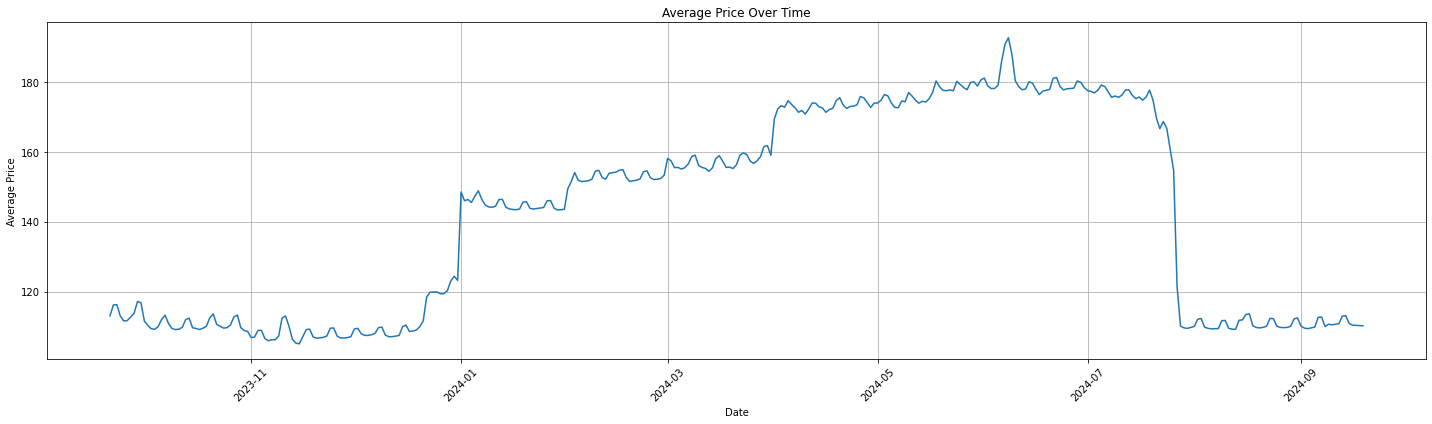

In [28]:
# Create a line plot using Matplotlib
plt.figure(figsize=(20, 6))
plt.plot(avg_price_per_day['date'], avg_price_per_day['mean'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure boundaries
plt.show()

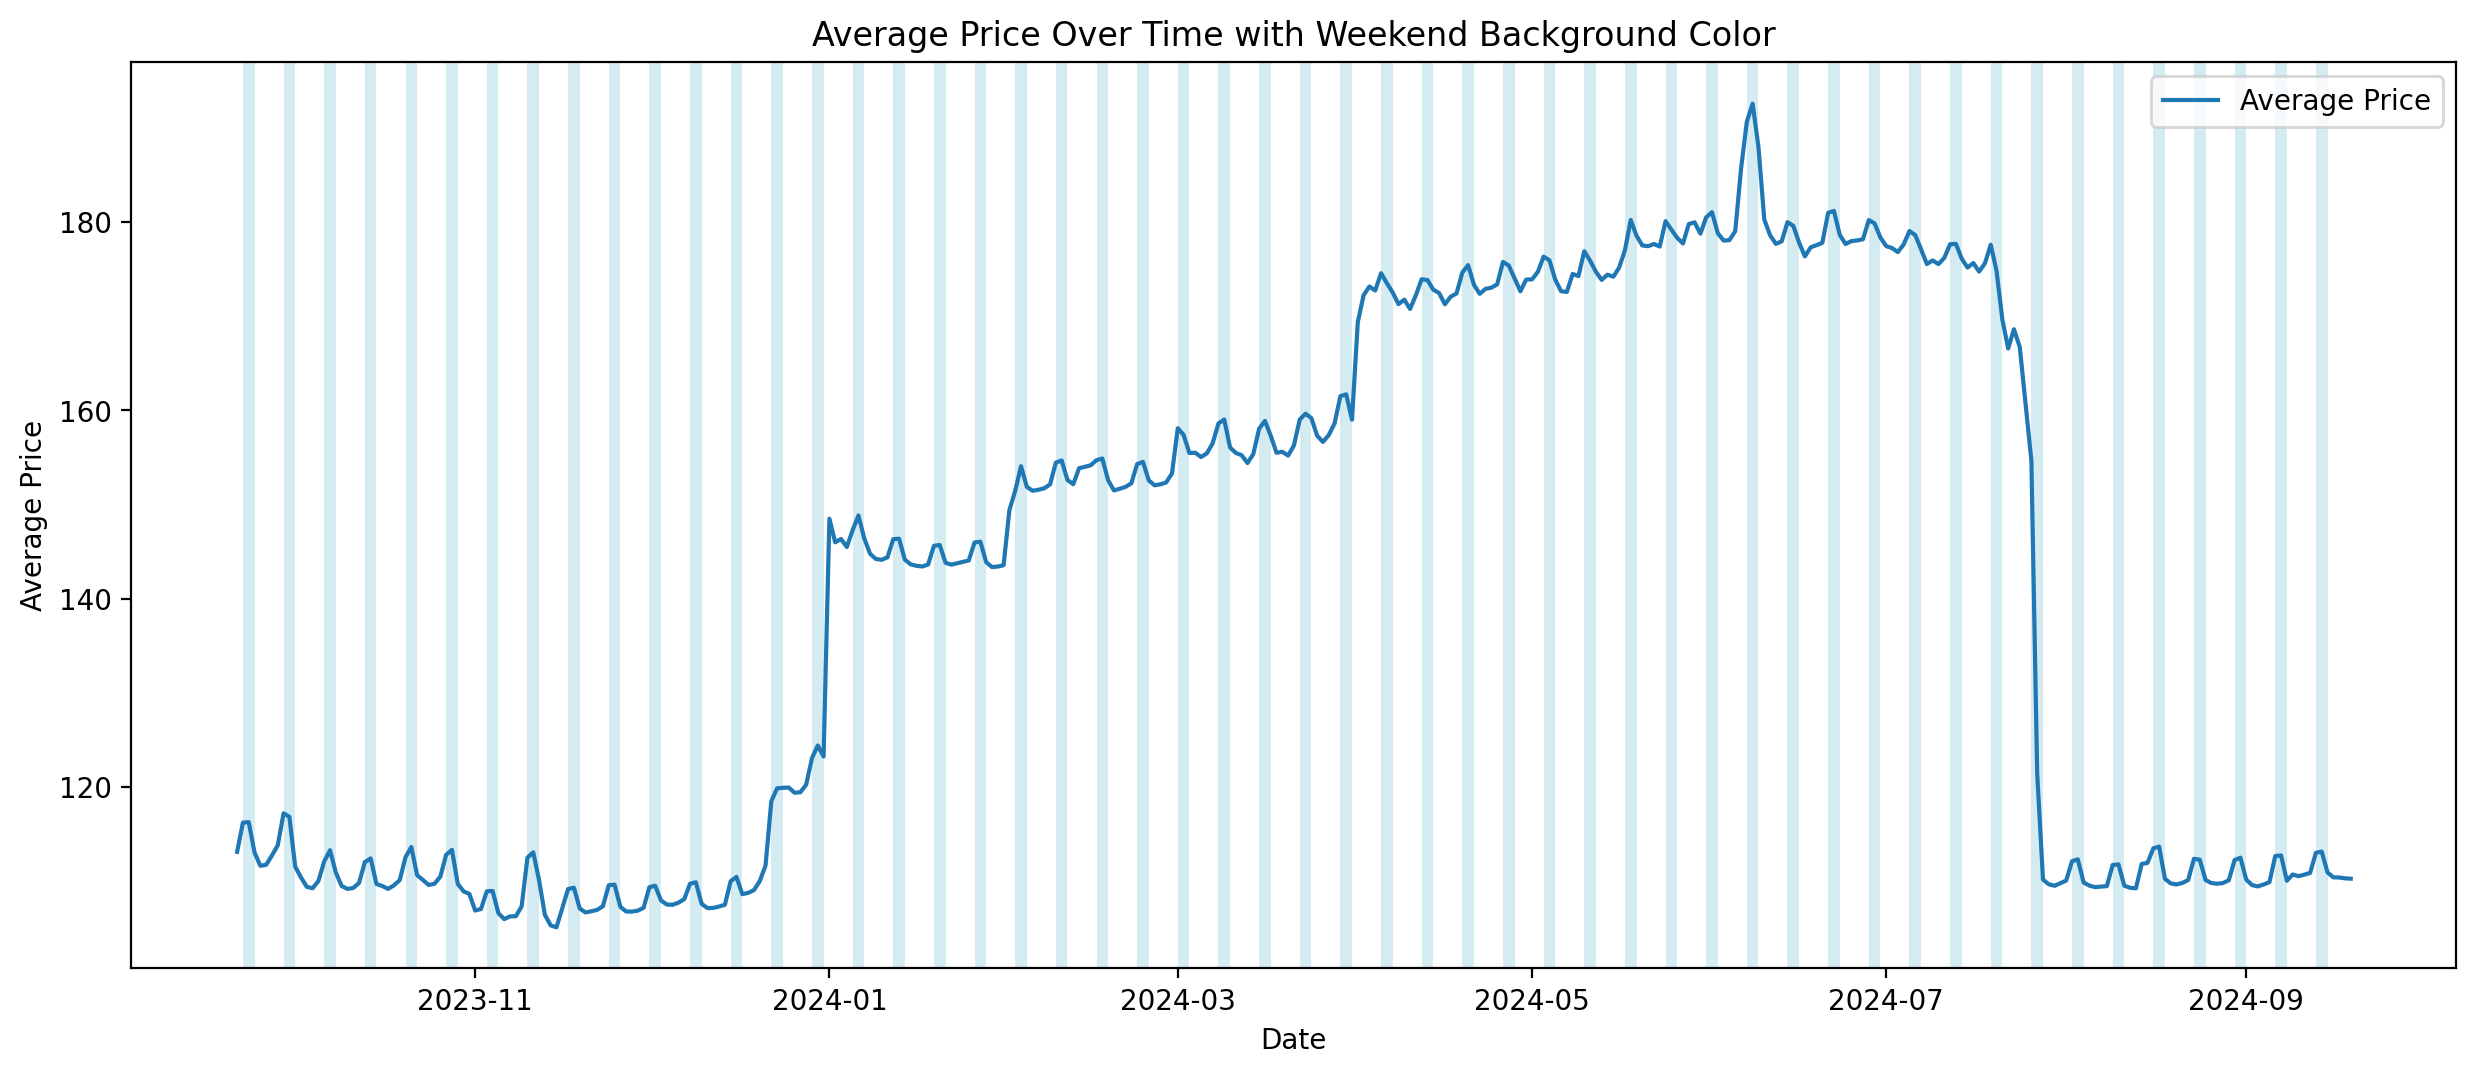

In [29]:
# Determine weekend days
date_range = pd.date_range(start=calendar_df['date'].min(), end = calendar_df['date'].max())
weekend_mask = (date_range.weekday >= 5)  # 5 and 6 correspond to Saturday and Sunday


# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(15,6), dpi = 200)

# Plot your data
ax.plot(avg_price_per_day['date'], avg_price_per_day['mean'], label='Average Price')

# Set the background color for weekend days
for i in range(len(weekend_mask)):
    if weekend_mask[i]:
        if i == 0:
            start_date = date_range[0]
        else:
            start_date = date_range[i - 1]

        end_date = date_range[i]

        ax.axvspan(start_date, end_date, facecolor='lightblue', alpha=0.5)
        

# Customize your plot
ax.set_xlabel('Date')
ax.set_ylabel('Average Price')
ax.set_title('Average Price Over Time with Weekend Background Color')
ax.legend()
#plt.grid(True)


# Show the plot
plt.show()

In [30]:
max_value_index = avg_price_per_day['mean'].idxmax()
avg_price_per_day.at[max_value_index, 'date']

Timestamp('2024-06-08 00:00:00')

# Prices per Day - results

The plot seems reasonable as off season has a lot lower prices since the demand is low, the prices start increasing from new year and peak in June - July and then plummet after August. 

We coloured the weekends with a background light blue colour. The local maxima usually fall on the weekends which makes sense since people include weekends to their vacation to avoid taking time off work. 

Further there is a correlation between the available listings plot and the average price which is to be expected.

**Fun Fact 2** For the weekend 8-9 June 2024 there is a maximum average price for listings in Athens, probably related to the Coldplay concert happening on these days as noted on the listings availability plot earlier.


# Listings per Host

First using the listings summary dataset we group by host id to determine shich listings are managed by the same host and place them in descending order based on the listings they have.

In [31]:
# Listings per Host
listings_per_host = listings_sum_df.groupby('host_id')['id'].count().reset_index()

listings_per_host = listings_per_host.rename(columns={'id': 'listings_count'})
listings_per_host = listings_per_host.sort_values(by='listings_count', ascending=False).reset_index()

In [32]:
listings_per_host

,index,host_id,listings_count
0,607,20104194,114
1,2069,113548208,88
2,1811,90390850,78
3,60,748818,74
4,1149,47267002,61
...,...,...,...
5769,2242,130728079,1
5770,2241,130646248,1
5771,2240,130612477,1
5772,2239,130551473,1


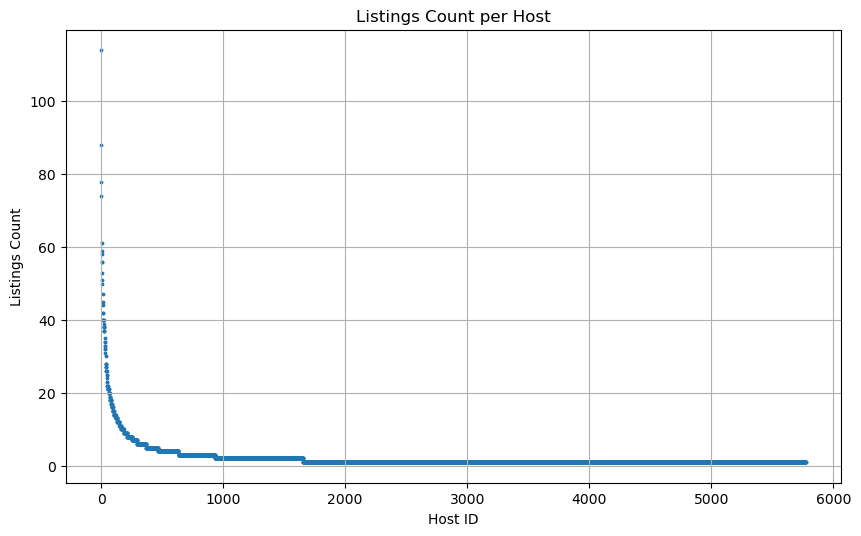

In [33]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(listings_per_host.index, listings_per_host['listings_count'], s=3)
plt.xlabel('Host ID')
plt.ylabel('Listings Count')
plt.title('Listings Count per Host')
plt.grid(True)
plt.show()

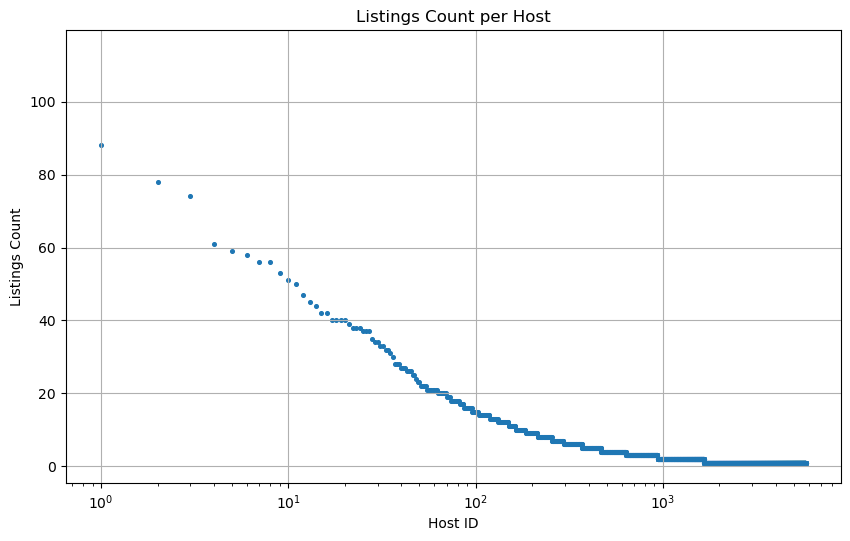

In [34]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(listings_per_host.index, listings_per_host['listings_count'], s=7)
plt.xlabel('Host ID')
plt.ylabel('Listings Count')
plt.xscale('log')
plt.title('Listings Count per Host')
plt.grid(True)
plt.show()

# Listings per Host - Results

Apart from a few owners having a lot of properties the vast majority only handles a handful of listings. But there are some hosts having up to 114 listings

# Visualize Listings

We use the folium library for the interactive map. 

- First we create a map centered around Athens
- For each listing we drop a circle on the coordinates of the map that is green in the listing is available or red if the listing is not available (based on the data of the 21th of September, essentially a snapshot)
- when you click each circle a popup arises that presents some basic info. Namely the name of the listing, the price per night, the minimum nights, the rating and the number of reviews.
- we create a second map that uses only a handful of listings to try different visualisation methods.
- If we include all of the listings at once there is a big clutter; thus we create clusters for better visualisation

In [35]:
# Remove the $ sign from the listings_df dataset

listings_df['price'] = pd.to_numeric(listings_df['price'].str.replace('$', '', regex = True).str.replace(',', '',regex = True))

In [36]:
# Create a map centered at an initial location
from folium.plugins import MarkerCluster

#subset of listings

# Create a Folium Map
m = folium.Map(location=[37.9838 , 23.7275], zoom_start=10, control_scale=True) # max_zoom=12

# Create a MarkerCluster
marker_cluster = MarkerCluster(spiderfy_on_max_zoom=True)

# Add markers for each property with pop-up information
for index, row in listings_df.iterrows():
    if (row['has_availability']=='t'):
        circle = 'green' 
    else:
        circle='red'
    neighborhood = row['neighbourhood_cleansed']
    point = folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=circle,
        fill=True,
        opacity = 1,
        fill_opacity=0.7,
        popup = folium.Popup(f"<strong>{row['name']}<br>{row['neighbourhood_cleansed']}</strong><br>Price: {row['price']} €/ night, {row['minimum_nights']} nights min<br> Rating:{row['review_scores_rating']}/5 out of {row['number_of_reviews']} reviews", max_width=200)
    )
    
    point.add_to(marker_cluster)
    
# Add the MarkerCluster to the Map
marker_cluster.add_to(m)

# Display the map
m.save('interactive_map.html')  # Save the map as an HTML file